# K-Means Clustering: Model Selection and Analysis

Objective:
Apply K-Means clustering, determine the optimal number of clusters, and analyze the impact of different k values.

Focus:
- Elbow Method
- Silhouette Score
- Cluster interpretation and trade-offs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'D:\Bridgeon\TASK\Customer_Segmentation_Clustering\data\Mall_Customers.csv')

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


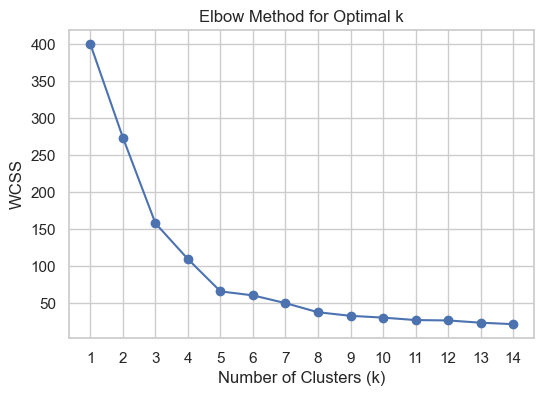

In [3]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.xticks(range(1,15))

plt.show()


## Elbow Method Interpretation

- WCSS decreases as k increases
- The rate of decrease slows significantly around **k = 5**
- This point represents a balance between compact clusters and model simplicity

The elbow method suggests **k ≈ 5** as a reasonable choice.

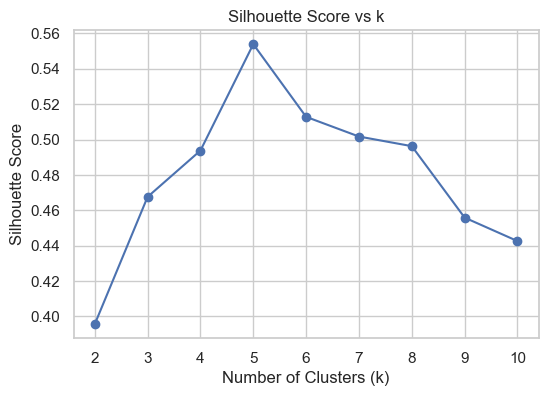

In [4]:
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()

## Silhouette Score Interpretation

- Higher silhouette score indicates better-defined clusters
- Scores peak around **k = 5**

Silhouette analysis supports the elbow method result.

## Final Choice of Number of Clusters

Based on:
- Elbow Method
- Silhouette Score
- Visual interpretability

**k = 5** is selected as the optimal number of clusters.

This choice balances:
- Cluster compactness
- Separation
- Business interpretability

In [5]:
kmeans_final = KMeans(n_clusters=5, random_state=42)
df["KMeans_Cluster"] = kmeans_final.fit_predict(X)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Effect of Changing k

- Decreasing k results in broader and simpler clusters but may merge distinct customer behaviors.  
- Increasing k creates more detailed clusters but can lead to noisy segments and unnecessary complexity.  

Choosing k is a balance between meaningful segmentation and simplicity.

## Trade-Off in Choosing k

As k increases, WCSS continuously decreases, meaning clusters fit the data better, but the improvement becomes marginal after k = 5.
At the same time, the Silhouette Score peaks at k = 5 and then declines, showing that adding more clusters reduces cluster separation.

The trade-off is between model complexity and cluster quality: lower k may underfit by grouping different customers together, while higher k overfits by creating smaller, less meaningful clusters.

### Conclusion

- K-Means clustering successfully segmented customers
- k = 5 offers the best balance between structure and usability
- Cluster labels are ready for visualization and business interpretation

Next Step:
Cluster visualization and geometric 

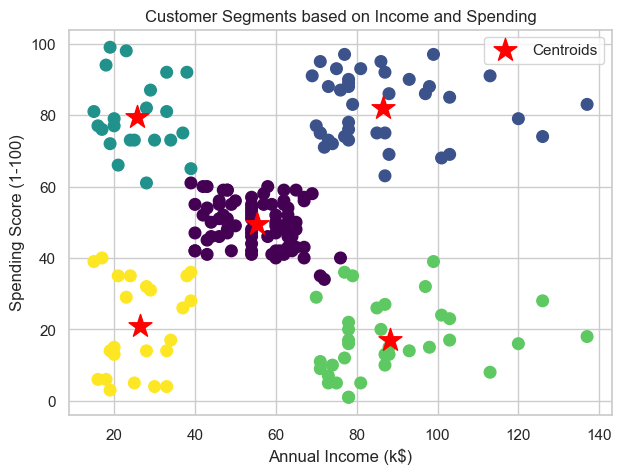

In [6]:
plt.figure(figsize=(7,5))

plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['KMeans_Cluster'],
    s=70,
    cmap='viridis'
)

# Plot centroids
centroids = kmeans_final.cluster_centers_
plt.scatter(
    centroids[:,0],
    centroids[:, 1],
    s=300,
    c="red",
    marker="*",
    label="Centroids"
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments based on Income and Spending")
plt.legend()
plt.show()

## Interpretation: Income vs Spending Clusters

This visualization shows how customers are grouped based on purchasing power and spending behavior.

Key observations:
- Customers with similar income levels fall into different clusters based on spending habits
- High-income customers are not always high spenders
- Centroids represent the “average customer” of each segment
- Clear separation between clusters indicates effective segmentation

This confirms that spending behavior is not solely driven by income.

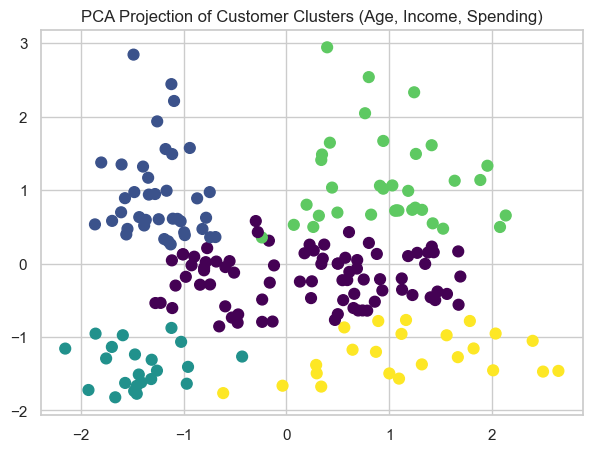

In [7]:
from sklearn.decomposition import PCA

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["KMeans_Cluster"],
    cmap='viridis',
    s=60
)
plt.title("PCA Projection of Customer Clusters (Age, Income, Spending)")
plt.show()

## Why PCA Was Applied on 3 Features

PCA was used to reduce three features (age, income, spending) into two dimensions for easy visualization, while keeping most of the information and checking if clusters remain clear when age is included

## What Visualization Reveals Beyond Numbers

While metrics like WCSS and silhouette score quantify clustering quality,
visualization provides intuitive understanding:

- Shows real-world separations and overlaps
- Highlights cluster compactness and spread
- Reveals borderline customers between segments
- Helps assess business interpretability of clusters



### Task 4 Conclusion

- Visual analysis confirms meaningful customer segmentation
- Cluster centroids represent distinct spending personas
- PCA supports numerical evaluation with geometric validation

Next Step:
Compare K-Means with other clustering algorithms

# Task 5: Algorithm Comparison 
Apply two additional algorithms:
- Hierarchical Clustering
- DBSCAN


For the algorithm comparison, we selected Annual Income and Spending Score. These two features represent the primary financial behavior of the customers. Using two dimensions allows for a clear visual comparison of how K-Means (centroid-based), Hierarchical (connectivity-based), and DBSCAN (density-based) partition the same space.

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


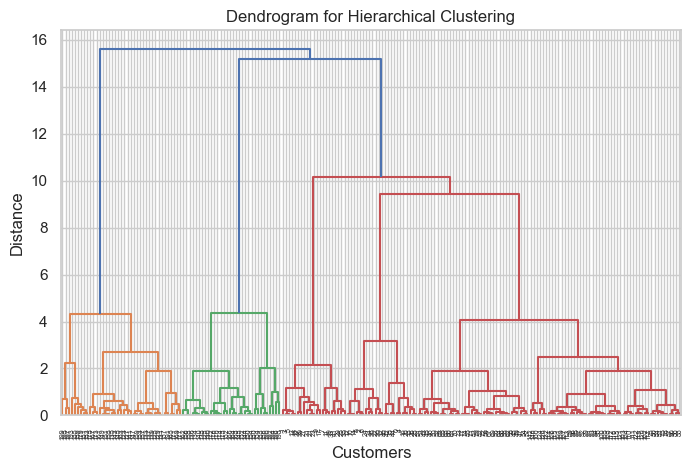

In [9]:
# Use same features for fair comparison
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X_scaled = StandardScaler().fit_transform(X)
# Dendrogram
plt.figure(figsize=(8,5))
Z = linkage(X_scaled, method="ward")
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

By visually inspecting the dendrogram, a cut around 5 clusters
produces meaningful and balanced groupings.

In [10]:
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
df["Hierarchical_Cluster"] = hc.fit_predict(X_scaled)

Choosing 

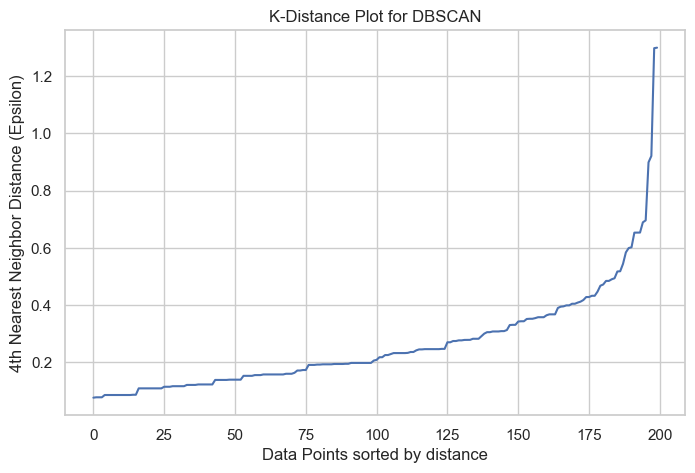

In [11]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort the distances (we take the 5th column which is the distance to the 5th neighbor)
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance (Epsilon)')
plt.grid(True)
plt.show()






In [12]:
from sklearn.cluster  import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

df["DBSCAN_Cluster"] = dbscan_labels

Number of clusters found: 4
Number of noise points: 15


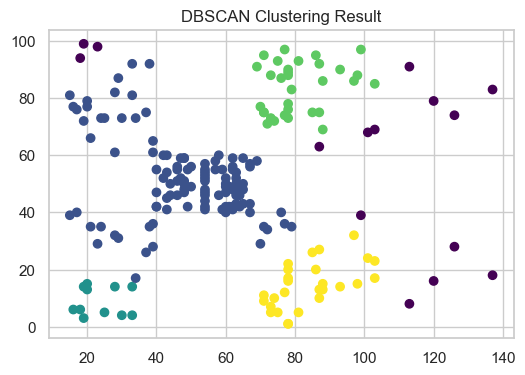

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(
    X["Annual Income (k$)"],
    X["Spending Score (1-100)"],
    c=dbscan_labels,
    cmap='viridis'
)
plt.title("DBSCAN Clustering Result")
plt.show()

DBSCAN identifies dense customer groups while labeling sparse regions as noise.
Some customers are not assigned to any cluster, reflecting irregular behavior.

## Algorithm Comparison

| Algorithm | Strengths | Weaknesses | When to Use |
|--------|----------|-----------|-----------|
| K-Means | Simple, fast, interpretable | Sensitive to k and scaling | Well-separated, spherical clusters |
| Hierarchical | No k required initially, dendrogram | Computationally expensive | Understanding cluster hierarchy |
| DBSCAN | Detects outliers, arbitrary shapes | Sensitive to eps | Noisy data, unknown clusters |

## Why Do Clustering Results Differ?

- K-Means groups points based on distance to centroids
- Hierarchical clustering merges points based on proximity
- DBSCAN groups points based on density

As a result:
- K-Means produces compact, equally sized clusters
- Hierarchical clustering reflects nested structure
- DBSCAN identifies dense regions and isolates outliers

Thus, the same data leads to different cluster shapes and assignments.

### Task 5 Conclusion

Multiple clustering algorithms provide different perspectives on customer behavior.
Choosing the right algorithm depends on business goals and data structure.

Next Step:
Cluster interpretation and business strategy 

# Task 6: Cluster Interpretation & Business Strategy

### K-Means Cluster Profiles

Cluster 0: High Income – High Spending  
Cluster 1: High Income – Low Spending  
Cluster 2: Average Income – Average Spending  
Cluster 3: Low Income – High Spending  
Cluster 4: Low Income – Low Spending